In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


### Load data data

In [2]:
features = xfirst.profile_functions.usp().parameter_names
target = 'Xfirst'

train, validation, test, normalization = xfirst.data.load_fits(
  'data',
  cut = xfirst.config.cuts.A1,
  drop_bad = True,
  xfirst = True,
  norm = features,
).values()

### Train the gradient boosting regressor

In [3]:
regressor = xfirst.models.gradient_boosting_regressor().fit(
  train = (train[features], train[target]),
  validation = (validation[features], validation[target]),
)

[0]	validation_0-rmse:29.15069	validation_1-rmse:29.23488
[1]	validation_0-rmse:24.06752	validation_1-rmse:24.26321
[2]	validation_0-rmse:20.88164	validation_1-rmse:21.18631
[3]	validation_0-rmse:18.91960	validation_1-rmse:19.34301
[4]	validation_0-rmse:17.71623	validation_1-rmse:18.22951
[5]	validation_0-rmse:16.97522	validation_1-rmse:17.57035
[6]	validation_0-rmse:16.51431	validation_1-rmse:17.17505
[7]	validation_0-rmse:16.20828	validation_1-rmse:16.93162
[8]	validation_0-rmse:15.99739	validation_1-rmse:16.78428
[9]	validation_0-rmse:15.86446	validation_1-rmse:16.69488
[10]	validation_0-rmse:15.75609	validation_1-rmse:16.61992
[11]	validation_0-rmse:15.68192	validation_1-rmse:16.57504
[12]	validation_0-rmse:15.63054	validation_1-rmse:16.53776
[13]	validation_0-rmse:15.59441	validation_1-rmse:16.52809
[14]	validation_0-rmse:15.54490	validation_1-rmse:16.50662
[15]	validation_0-rmse:15.49769	validation_1-rmse:16.49189
[16]	validation_0-rmse:15.47380	validation_1-rmse:16.48546
[17]	va

### Validation curve

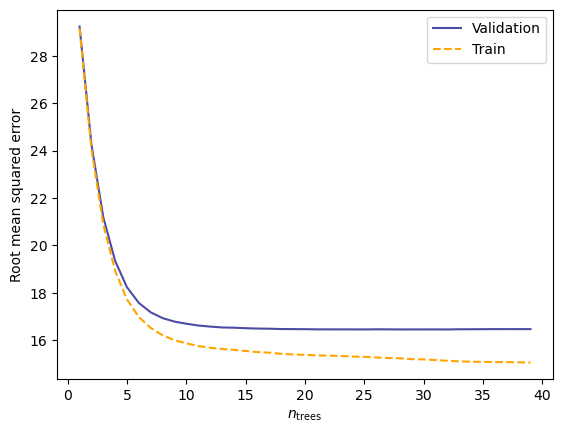

In [4]:
fig = regressor.draw()

### Compute predictions

In [5]:
results = regressor.test(test[features], test[target])
results['lgE'] = test['lgE']
results

predictions      target  residuals        lgE
   id                                                 
p  0       13.325532   11.037822   2.287710  18.257744
   1      160.452118  154.190765   6.261353  18.110353
   2       13.096865    1.349946  11.746920  19.747112
   3       19.687321    2.729655  16.957666  18.122419
   4       19.040442    9.357868   9.682573  18.801651
...              ...         ...        ...        ...
Fe 3995    14.035171    3.150036  10.885135  19.733873
   3996     8.813946   14.810402  -5.996456  19.730103
   3997    11.730391    9.629048   2.101342  18.766838
   3998     9.673683   17.264286  -7.590603  17.933887
   3999     7.971501    0.313324   7.658177  18.106028

[19128 rows x 4 columns]

### Draw predictions

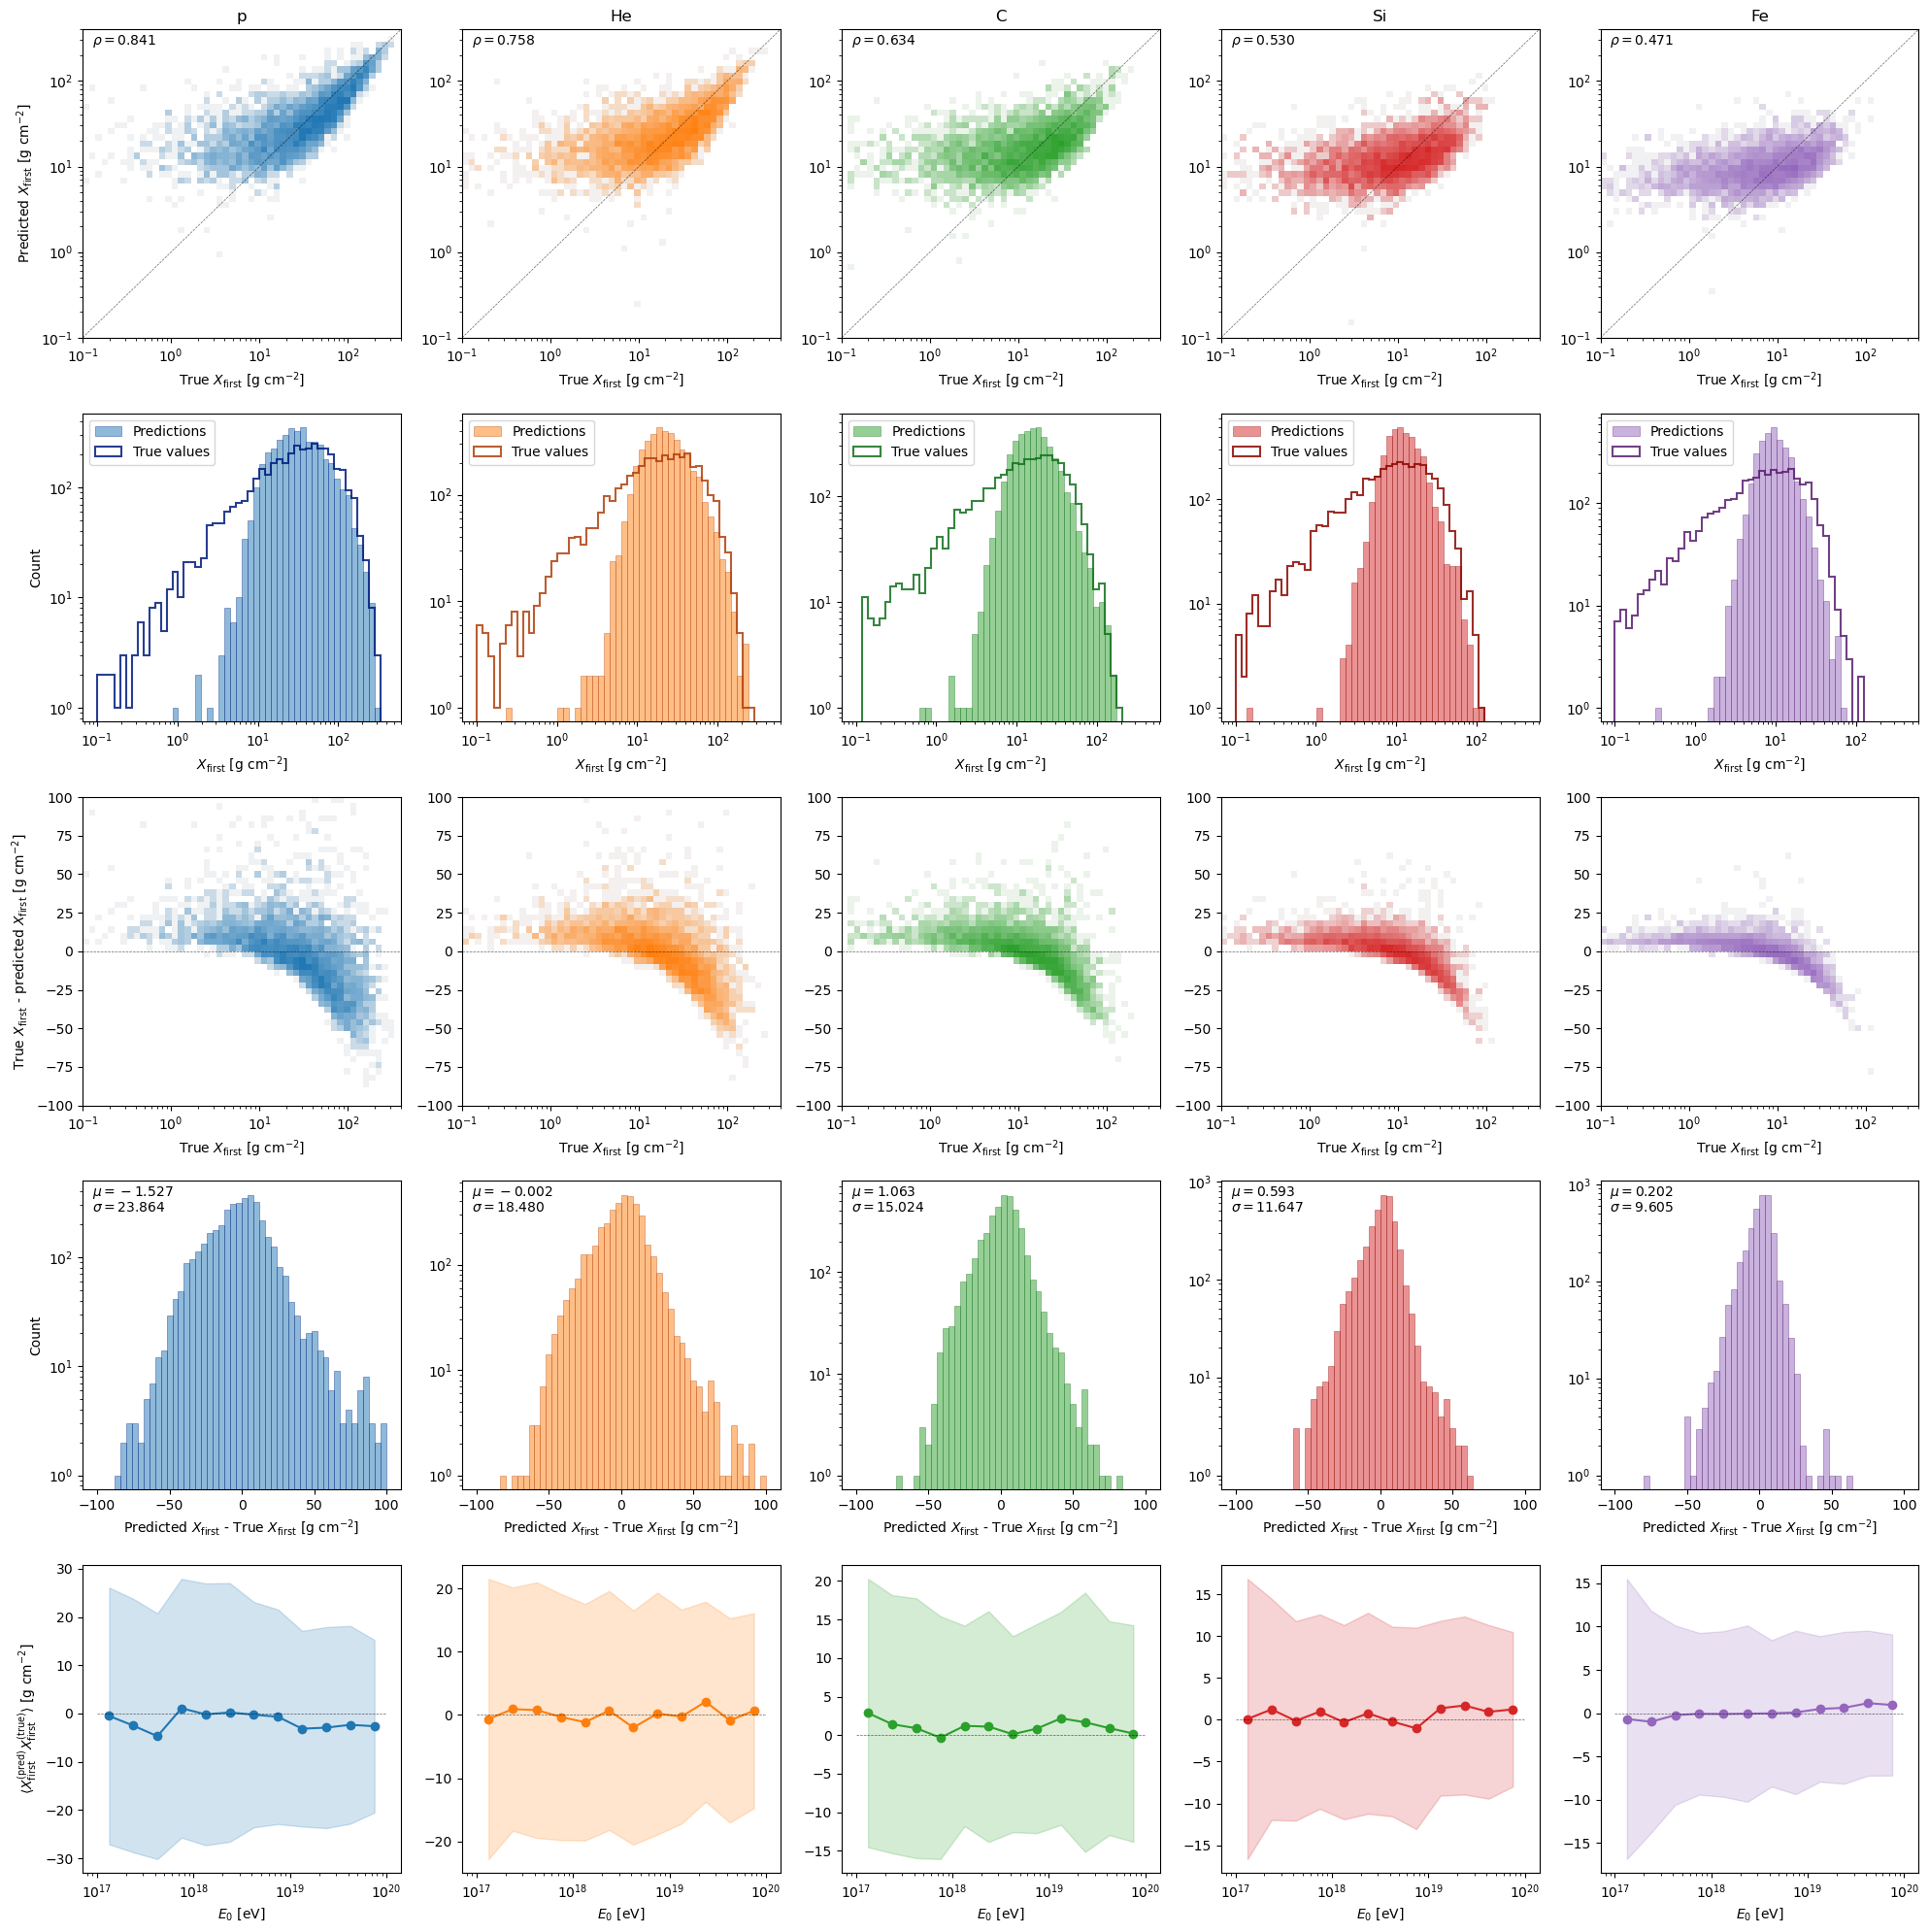

In [6]:
fig = xfirst.viz.draw_predictions(results)